In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
no_inv = "data/no_inv.csv"
inv = "data/data_A_-2.csv"

df_inv = pd.read_csv(inv)
df_no_inv = pd.read_csv(no_inv)
df_no_inv

,Unnamed: 0,A,B,C,D
0,0,1.226553,-0.168701,-0.522752,3.395254
1,1,-0.903082,0.773491,-1.848876,-0.676573
2,2,3.194309,0.476922,2.301758,2.717386
3,3,-2.433267,0.393658,0.886653,-1.826925
4,4,2.283188,0.357860,1.340110,1.925328
...,...,...,...,...,...
495,495,-3.025344,-0.021760,0.397056,-3.003585
496,496,1.120164,0.654946,0.078716,2.465218
497,497,1.922610,1.429342,0.493622,0.493268
498,498,0.818834,-0.509633,0.667574,1.328466


Text(0.5, 1.0, 'A & D')

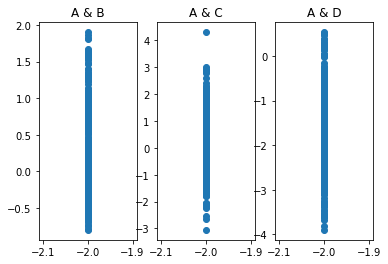

In [176]:
plt.subplot(1, 3, 1)
plt.scatter(df_inv["A"], df_inv["B"])
plt.title("A & B")
plt.subplot(1, 3, 2)
plt.scatter(df_inv["A"], df_inv["C"])
plt.title("A & C")
plt.subplot(1, 3, 3)
plt.scatter(df_inv["A"], df_inv["D"])
plt.title("A & D")


Text(0.5, 1.0, 'B & D')

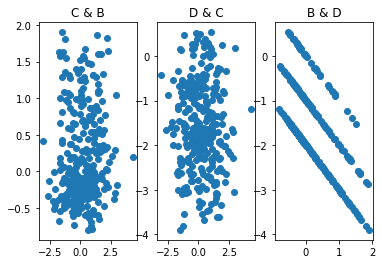

In [177]:
plt.subplot(1, 3, 1)
plt.scatter(df_inv["C"], df_inv["B"])
plt.title("C & B")
plt.subplot(1, 3, 2)
plt.scatter(df_inv["C"], df_inv["D"])
plt.title("D & C")
plt.subplot(1, 3, 3)
plt.scatter(df_inv["B"], df_inv["D"])
plt.title("B & D")


In [178]:
A_mean = np.mean(df_no_inv["A"])
B_mean = np.mean(df_no_inv["B"])
C_mean = np.mean(df_no_inv["C"])
D_mean = np.mean(df_no_inv["D"])

print(A_mean,  B_mean, C_mean, D_mean)

1.0685000248319994 0.21620841755000011 0.16259399535600016 1.472291607285999


In [179]:
A2_mean = np.mean(df_inv["A"])
B2_mean = np.mean(df_inv["B"])
C2_mean = np.mean(df_inv["C"])
D2_mean = np.mean(df_inv["D"])

print(A2_mean, B2_mean, C2_mean, D2_mean)

-2.0 0.20851369259999994 0.18827114380999999 -1.5918470259333333


In [180]:
A_var = np.var(df_no_inv["A"])
B_var = np.var(df_no_inv["B"])
C_var = np.var(df_no_inv["C"])
D_var = np.var(df_no_inv["D"])

A_var, B_var, C_var, D_var

(3.870759902507188, 0.37999924295245247, 1.2062632400595983, 4.686437152828637)

In [181]:
A2_var = np.var(df_inv["A"])
B2_var = np.var(df_inv["B"])
C2_var = np.var(df_inv["C"])
D2_var = np.var(df_inv["D"])

A2_var, B2_var, C2_var, D2_var

(0.0, 0.40077714447928625, 1.3842540788157862, 0.9620472321348421)

In [182]:
def var(df, var):
    return np.var(df[var])

def mean(df, var):
    return np.mean(df[var])

def percentage_diff(var1, var2):
    return abs((var2 - var1)) / ((var2 + var1)) / 2

In [183]:
percentage_diff(A2_mean, A_mean), percentage_diff(B2_mean, B_mean), percentage_diff(C2_mean, C_mean), percentage_diff(D2_mean, D_mean)

(-1.64707466807961,
 0.009058540591732571,
 0.036591193578013936,
 -12.81472085450999)

In [184]:
percentage_diff(A2_var, A_var), percentage_diff(B2_var, B_var), percentage_diff(C2_var, C_var),percentage_diff(D2_var, D_var)

(0.5, 0.013305923348412189, 0.034354303956836446, 0.3296804653128093)

In [185]:
rs = np.random.RandomState(0)
corr = df_no_inv.corr()
corr.style.background_gradient(cmap='magma')


,Unnamed: 0,A,B,C,D
Unnamed: 0,1.000000,0.064343,-0.023427,0.033813,0.053497
A,0.064343,1.000000,0.018177,0.551803,0.903782
B,-0.023427,0.018177,1.000000,-0.025805,-0.246866
C,0.033813,0.551803,-0.025805,1.000000,0.483370
D,0.053497,0.903782,-0.246866,0.483370,1.000000


In [186]:
import seaborn as sns

Correlation between x and y: -0.25


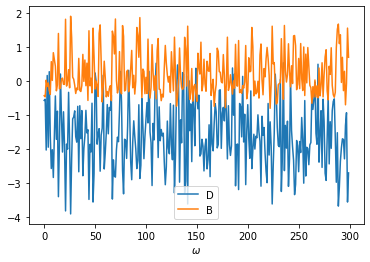

<Figure size 432x288 with 0 Axes>

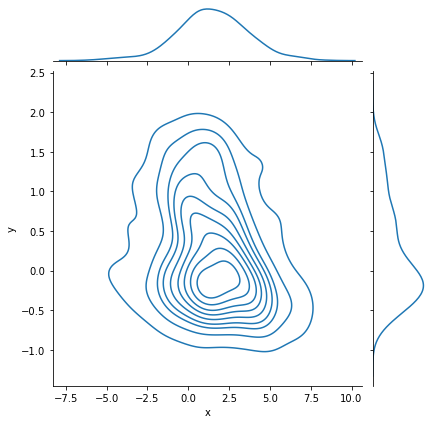

In [187]:
plt.figure();
plt.plot(df_inv["D"]);
plt.plot(df_inv["B"]);
plt.legend(('D','B'));
plt.xlabel(r'$\omega$');
print('Correlation between x and y: %.2f'%np.corrcoef(df_no_inv["D"],df_no_inv["B"])[0,1]);
plt.figure();
sns.jointplot(data={'x':df_no_inv["D"],'y':df_no_inv["B"]},x='x',y='y',kind='kde');

0.7981805779807036

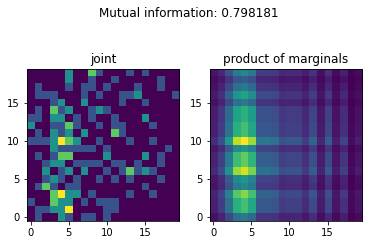

In [188]:
def MI(x,y,Nbins=21):
    bins = np.linspace(np.min(x),np.max(x),Nbins)
    eps=np.spacing(1)
    x_marginal = np.histogram(x,bins=bins)[0]
    x_marginal = x_marginal/x_marginal.sum()
    y_marginal = np.array(np.histogram(y,bins=bins)[0])
    y_marginal = y_marginal/y_marginal.sum()
    xy_joint = np.array(np.histogram2d(x,y,bins=(bins,bins))[0])
    xy_joint = xy_joint/xy_joint.sum()
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(xy_joint.T,origin='lower')
    plt.title('joint')
    plt.subplot(1,2,2)
    plt.imshow((x_marginal[:,None]*y_marginal[None,:]).T,origin='lower')
    plt.title('product of marginals')
    MI=np.sum(xy_joint*np.log(xy_joint/(x_marginal[:,None]*y_marginal[None,:]+eps)+eps))
    plt.suptitle('Mutual information: %f'%MI)
    return(MI)
MI(df_inv["B"],df_inv["C"])
